Plot the dependency between two similarity metrics

<h2>Import packages and data</h2>

In [1]:
from scipy.io import netcdf
import similarity_measures as sim
import calculations as calc
import plots
import numpy as np

In [2]:
nc_l30 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l30-u.nc")

<h2>Derive QBO</h2>

In [3]:
lon = calc.convert_coordinates_to_grid(nc_l30.variables["longitude"][:], 180)
lat = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0)

lon_step = 256 #Around the whole equator
lat_step = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0) - calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 5)


u_l30 = nc_l30.variables["u"]

#Deseasonalize
u_l30 = calc.deseasonalize_map(u_l30)

qbo_equator = calc.derive(u_l30[:, :, :, :], lat, lon, 0, lat_step, lon_step)

<h2>Calculate and plot dependency between two similarity metrics</h2>

In [4]:
print(plots.plot_similarity_dependency.__doc__)


    Calculate and plot dependency between two similarity metrics with one similarity
    metric on the x-axis and one on the y-axis

    Args:
        map_array (numpy.ndarray): Map with 4 dimensions - time, level, latitude, longitude
        reference_series (numpy.ndarray): 1 dimensional reference series
        metric1 (function): First similarity metric to compute similarity between two time series
        metric2 (function): Second similarity metric to compute similarity between two time series
        level (int, optional): Level on which the similarity should be calculated
            Defaults to 0
    


<h4>Pearson's Correlation vs Mutual Information</h4>

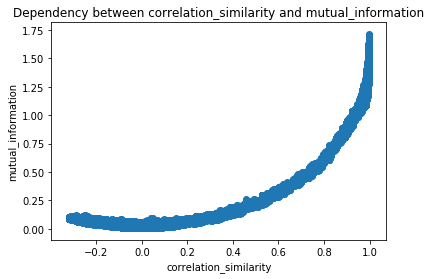

In [5]:
plots.plot_similarity_dependency(u_l30, qbo_equator, sim.correlation_similarity, sim.mutual_information)

<h4>Transfer entropy vs Mutual information</h4>

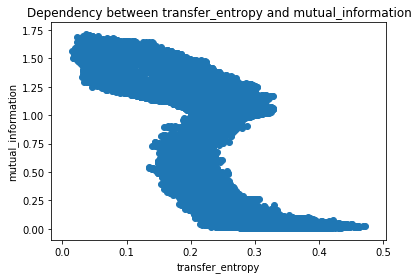

In [6]:
plots.plot_similarity_dependency(u_l30, qbo_equator, sim.transfer_entropy, sim.mutual_information)

<h4>Cosine similarity vs Manhattan Distance</h4>

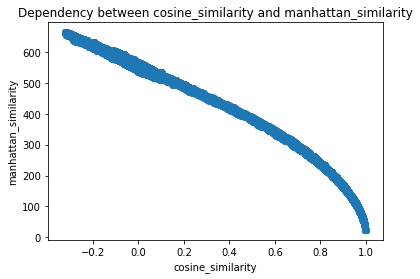

In [7]:
plots.plot_similarity_dependency(u_l30, qbo_equator, sim.cosine_similarity, sim.manhattan_similarity)

<h2>Plot regions where similarity metrics have extreme values</h2>

In [8]:
print(plots.plot_similarity_dependency_regions.__doc__)


    Plot regions where two similarity metrics have extreme values.

    Args:
        map_array (numpy.ndarray): Map with 4 dimensions - time, level, latitude, longitude
        reference_series (numpy.ndarray): 1 dimensional reference series
        metric1 (function): First similarity metric to compute similarity between two time series
        metric2 (function): Second similarity metric to compute similarity between two time series
        mode (str, optional): Mode defining which extremes to visualize
            Options: "high_high": High values in metric1 and high values in metric2
                     "high_low": High values in metric1 and low values in metric2
                     "low_high": Low values in metric1 and high values in metric2
                     "low_low": Low values in metric1 and low values in metric2
            Defaults to "high_high"
        level (int, optional): Level on which the similarity should be calculated
            Defaults to 0
    


<h4>Plot regions with <u>high</u> values of Pearson's Correlation and <u>high</u> values of Mutual Information</h4>

C:\Users\tousp\Climate-Similarity-Metrics\plots.py:301: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='mill', lon_0=30, resolution='l')


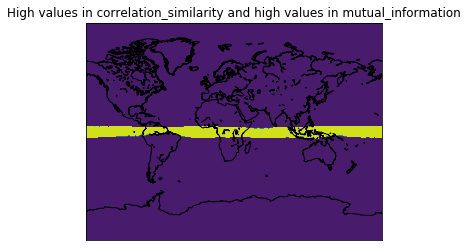

In [9]:
plots.plot_similarity_dependency_regions(u_l30, qbo_equator, sim.correlation_similarity, sim.mutual_information,
                                       mode="high_high", level=0)

<h4>Plot regions with <u>high</u> values of Cosine Similarity and <u>low</u> values of Manhattan Distance</h4>

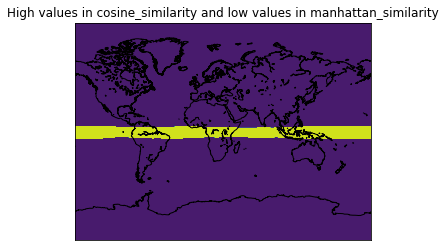

In [10]:
plots.plot_similarity_dependency_regions(u_l30, qbo_equator, sim.cosine_similarity, sim.manhattan_similarity,
                                       mode="high_low", level=0)

<h4>Plot regions with <u>low</u> values of Cosine Similarity and <u>high</u> values of Manhattan Distance</h4>

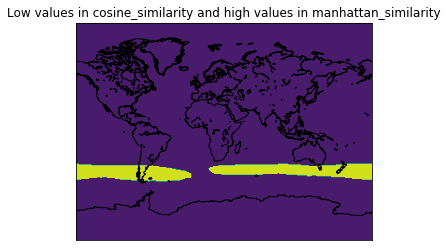

In [11]:
plots.plot_similarity_dependency_regions(u_l30, qbo_equator, sim.cosine_similarity, sim.manhattan_similarity,
                                       mode="low_high", level=0)

<h4>Plot regions with <u>low</u> values of Pearson's Correlation and <u>low</u> values of Mutual Information</h4>

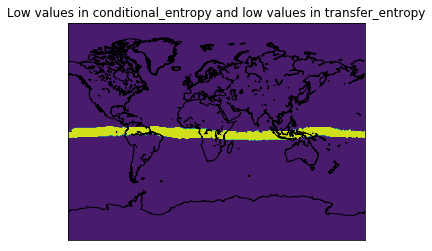

In [12]:
plots.plot_similarity_dependency_regions(u_l30, qbo_equator, sim.conditional_entropy, sim.transfer_entropy,
                                       mode="low_low", level=0)